<a href="https://colab.research.google.com/github/CheayeonLee/ESAA_OB/blob/main/12%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 04. 모델 세부 설정

In [2]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set:',x_train.shape, y_train.shape)
print('test set:',x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max:255
x_test = x_test / x_test.max() # max:255

11490434/11490434 [==============================] - 0s 0us/step
train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### 4-1 초기값 설정

In [3]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

In [4]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


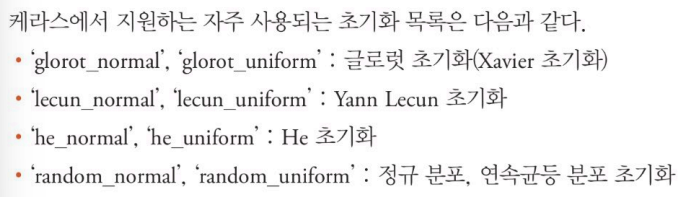

### 4-2 규제(Regularization)
- 모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 한다.

In [5]:
# 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [6]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer='regularizer', activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
regularizer


/usr/local/lib/python3.10/dist-packages/keras/src/regularizers.py:426: UserWarning: The `keras.regularizers.serialize()` API should only be used for objects of type `keras.regularizers.Regularizer`. Found an instance of type <class 'str'>, which may lead to improper serialization.
  warnings.warn(


### 4-3 드롭아웃(Dropout)
- 과대적합: 모델의 층이 넓고 깊어질 때 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향이 있음(좋지 않은 예측력을 보임)
- 즉 훈련 데이터셋에 너무 적응한 것
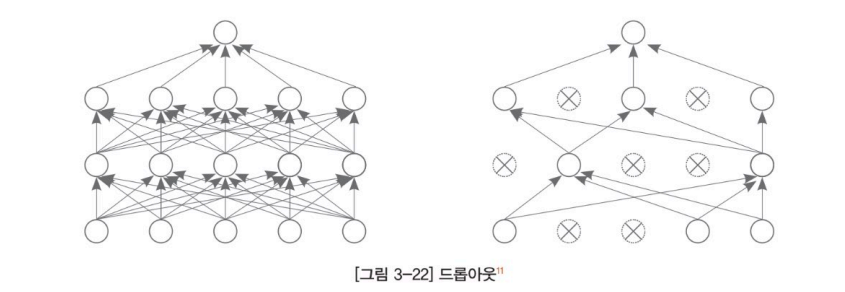

In [7]:
# Dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### 4-4 배치 정규화(Batch Normalization)
- 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화
- 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있음

In [8]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

### 4-5 활성화(activation) 함수

In [10]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha = 0.2로 변경
tf.keras.layers.LeakyReLU(alpha = 0.2)

In [11]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha = 0.2 적용
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha = 0.2 적용
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

In [12]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)
# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)
# Model C: Dense + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.9134 - val_loss: 0.1605 - val_accuracy: 0.9525
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1311 - accuracy: 0.9608 - val_loss: 0.1219 - val_accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0965 - accuracy: 0.9701 - val_loss: 0.1069 - val_accuracy: 0.9670
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0757 - accuracy: 0.9766 - val_loss: 0.0997 - val_accuracy: 0.9706
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0618 - accuracy: 0.9805 - val_loss: 0.0936 - val_accuracy: 0.9724
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0932 - val_accuracy: 0.9723
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0450 - accuracy: 0.9855 - val_loss: 0.1063 - val_accuracy:

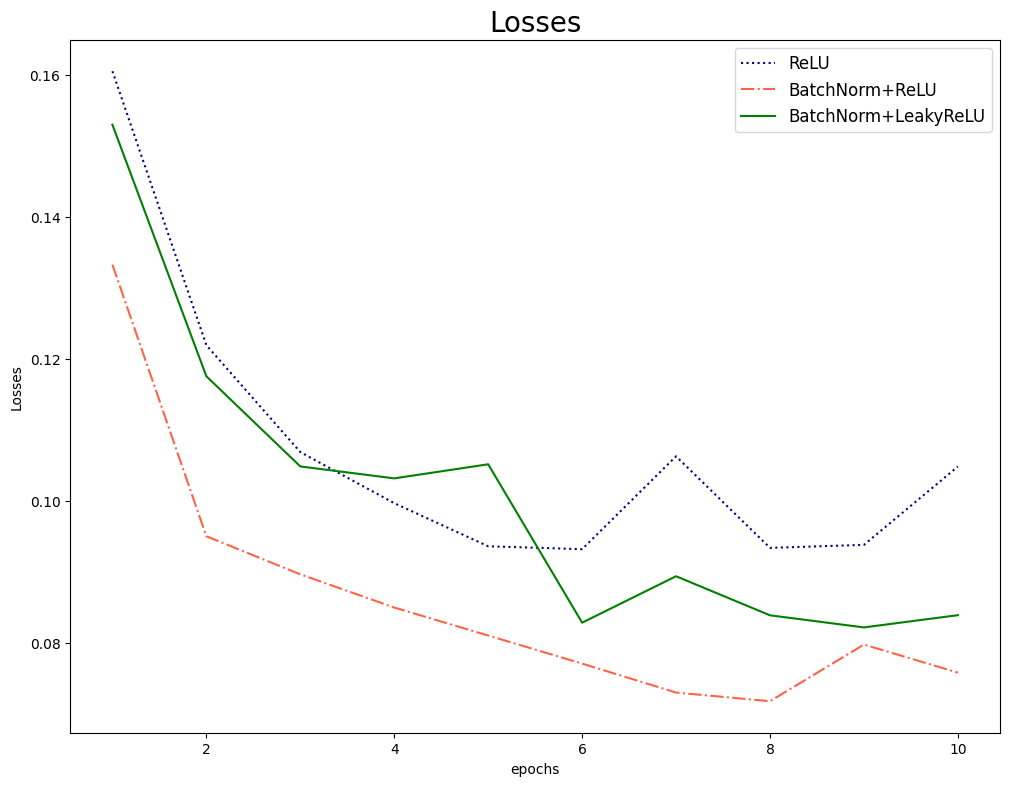

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

## 06. 모델 저장 및 불러오기

### 6-1 모델을 파일로 저장

In [16]:
# 모델을 h5 포맷으로 저장
model_c.save('h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 6-2 저장된 모델 복원

In [18]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

In [19]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss:{loss:.5f}, acc:{acc:.5f}')

h5 model] loss:0.08391, acc:0.97470


In [22]:
# 모델을 SavedModel 포맷으로 저장
model_c.save('saved-model')

In [23]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

In [24]:
# 모델 검증(HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss:{loss:.5f}, acc:{acc:.5f}')

# 모델 검증(SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss:{loss:.5f}, acc:{acc:.5f}')

h5 model] loss:0.08391, acc:0.97470
h5 model] loss:0.08391, acc:0.97470


## 07. 복잡한 모델 생성

### 7-1 함수형 API(Functional API)
- Sequential과 달리 복잡한 구조의 모델 정의 가능
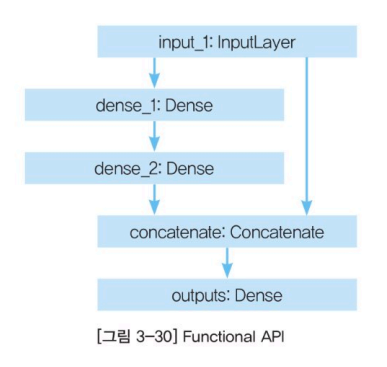

In [25]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

모델 인스턴스 생성 시 name 매개변수에 이름을 지정하면 해당 이름이 summary()에 출력

In [26]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


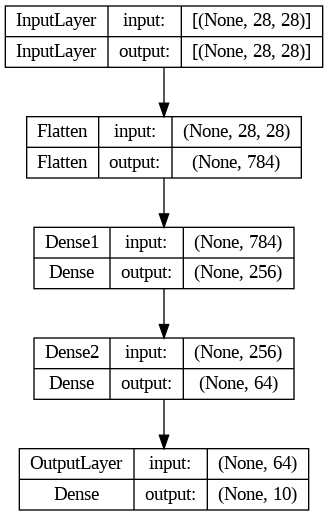

In [27]:
import tensorflow
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [28]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model ] loss: {loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2170 - accuracy: 0.9362
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0889 - accuracy: 0.9722
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0599 - accuracy: 0.9813
Functional Model ] loss: 0.08018, acc:0.97580


### 7-2 모델 서브클래싱(Model Subclassing)
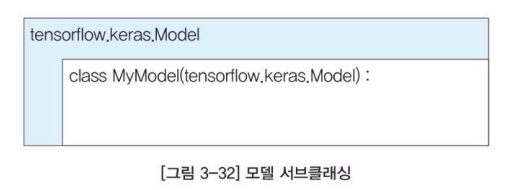

In [29]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel,self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

  # method overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [30]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model ] loss:{loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2219 - accuracy: 0.9345
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0885 - accuracy: 0.9729
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0611 - accuracy: 0.9802
Subclassing Model ] loss:0.08012, acc:0.97570


### 7-3 서브클래싱 모델 파라미터를 활용한 생성

In [32]:
class MyModel(tf.keras.Model):

  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel,self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

  # method overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [33]:
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model ] loss:{loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2143 - accuracy: 0.9370
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0888 - accuracy: 0.9722
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0596 - accuracy: 0.9815
Subclassing Model ] loss:0.08070, acc:0.97580
